<a href="https://colab.research.google.com/github/sultanbst123/Management_system_hotel/blob/main/Data_Scientist_Take_Home_Test!(Delman_io).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Data Scientist - Take Home Test oleh sultan syach</h2>

## Library & File

In [ ]:
!pip install mplcyberpunk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy.stats import *
import random

# file library
import os 
from zipfile import ZipFile

# visualization library
import seaborn as sns
from wordcloud import WordCloud
import mplcyberpunk
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)
import warnings 

warnings.filterwarnings("ignore")
plt.style.use("cyberpunk")

In [ ]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5
mpl.rcParams["axes.titlepad"] = 20
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['axes.edgecolor'] = "white"
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams["boxplot.boxprops.color"] = "white"
mpl.rcParams["boxplot.whiskerprops.color"] = "white"
mpl.rcParams["boxplot.capprops.color"] = "white"
mpl.rcParams["boxplot.flierprops.markerfacecolor"] =  "white"

## EDA(Exploratory data analysis) 
***Mencari wawasan berdasarkan data dari video yang trending***

### YouTube videos (data utama)


Deskripsi dari fitur data youtube-videos.parquet: 

- video_id: unique ID for a Youtube video, note that this value is NOT unique in this
dataset (the same video can be listed more than once on multiple trending_date)
- trending_date: when the specific video is trending (in YY.DD.MM format)
- title: title of the video (what you see before clicking on a YT video)
- channel_title: channel that published the video
- category_id: unique ID for the video category (see column id in the other dataset)
- publish_time: when the video was published (in YYYY-MM-DDThh:mm:ssZ format)
- tags: YouTube tags, separated by delimiter “|”
- views, likes, dislikes, comment_count: user engagement metrics towards the video
- comments_disabled: whether comment is disabled for the video
- ratings_disabled: whether rating system is disabled for the video
- description: extra sentences written by the uploader to explain the video content

In [ ]:

df = pd.read_parquet("/content/drive/MyDrive/Untuk test/youtube-videos.parquet")

In [ ]:
df.head() # check dataframe nya

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# check keseluruhan infomasi fitur data nya 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
# check ada berapa nilai duplikat nya

In [ ]:
print(f"jumlah nilai duplikat adalah: {df.duplicated().sum()} nilai\n") 
df[df.duplicated()].sample(5) # filter data yang duplikat dan ambil 5 sample secara random

jumlah nilai duplikat adalah: 48 nilai



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34935,ksjWPxFPsos,18.15.05,Can you Shrek it? (YIAY #414),jacksfilms,23,2018-05-11T19:20:29.000Z,"Jacksfilms|""Jack Douglass""|""YGS""|""YGS 100""|""YG...",1663506,79165,1879,36476,https://i.ytimg.com/vi/ksjWPxFPsos/default.jpg,False,False,False,Get your first 3 meals free by going here! ► h...
34914,96oKlWv5wSo,18.15.05,AMAZING All You Can Eat BBQ KEBAB Buffet in I...,Strictly Dumpling,19,2018-05-13T20:17:14.000Z,"indian buffet|""kebab buffet""|""buffet""|""all you...",456475,10561,337,1384,https://i.ytimg.com/vi/96oKlWv5wSo/default.jpg,False,False,False,I'm always on the lookout for new amazing buff...
34918,xTrwT0jSUg0,18.15.05,Mother Knows Best - SNL,Saturday Night Live,24,2018-05-13T05:06:11.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",1248343,15750,1919,1261,https://i.ytimg.com/vi/xTrwT0jSUg0/default.jpg,False,False,False,"Three mother-child pairs (Cecily Strong, Aidy ..."
34941,uxbQATBAXf8,18.15.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",15960127,374825,3823,9059,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...
34906,1RZYOeQeIXE,18.15.05,Sarah Paulson Gets Scared During '5 Second Rule',TheEllenShow,24,2018-05-14T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""seas...",704786,19880,248,669,https://i.ytimg.com/vi/1RZYOeQeIXE/default.jpg,False,False,False,Sarah Paulson agreed to play a friendly game o...


In [ ]:
# check ada berapa nilai yang hilang di fitur 

pd.DataFrame({"jumlah nilai nan": (df.isnull().sum()/df.shape[0])*100}).sort_values("jumlah nilai nan",ascending=False)

,jumlah nilai nan
description,1.391975
video_id,0.000000
trending_date,0.000000
title,0.000000
channel_title,0.000000
category_id,0.000000
publish_time,0.000000
tags,0.000000
views,0.000000
likes,0.000000



Laporan
Berdasarkan dari informasi yang di atas: 
- terdapat 40949 baris dan 16 fitur
- terdapat 3 fitur yang bertipe bool, 5 fitur yang bertipe int & 8 fitur yang bertipe object/category
- Terdapat 48 nilai duplikat dan saya tidak akan menghapus nilai tersebut 
- dan fitur description yang mempunyai 1% nilai yang hilang

In [ ]:
## handling missing and duplicate values

In [ ]:
# isi nilai deacription yang hilang dengan None, karena nilai nya berupa text 

df.description.fillna("None", inplace=True)

In [ ]:
"""
Ada 48 nilai duplikat, 
saya tidak akan menghapus nya karena akan mengurangi informasi yang akan saya ambil
"""

In [ ]:
# check lagi 
print(f"jumlah nilai nan adalah: {df.isnull().sum().sum()}")

jumlah nilai nan adalah: 0


### YouTube categories

Deskripsi dari fitur data youtube-categories.json: 
- id: unique ID for the category, refers to category_id on the other dataset
- title: title of the given category
- channel_id: unique identifier for the channel

In [ ]:
df_2 = pd.read_json("/content/drive/MyDrive/Untuk test/youtube-categories.json")

In [ ]:

# ratakan nilai dict di dataframe 

df_3 = pd.json_normalize(df_2.snippet.values)

In [ ]:

# lalu gabungkan antara df_2 & df_3

new_yc = pd.concat([df_2, df_3],axis=1) 
new_yc

,kind,etag,id,snippet,channelId,title,assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Sports,True
5,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZb...",18,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Short Movies,False
6,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf...",19,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Travel & Events,True
7,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFS...",20,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Gaming,True
8,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf...",21,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,Videoblogging,False
9,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [ ]:

# extract angka ke title category sesuai id 

new_yc[["title","id"]]

,title,id
0,Film & Animation,1
1,Autos & Vehicles,2
2,Music,10
3,Pets & Animals,15
4,Sports,17
5,Short Movies,18
6,Travel & Events,19
7,Gaming,20
8,Videoblogging,21
9,People & Blogs,22


In [ ]:

# masukan ke dictionary 

category = dict(zip(new_yc.id.values,new_yc.title.values))

In [ ]:
category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

Ada 44 category

### Data baru

In [ ]:
# lalu bikin fitur baru df, yang berisi category label berdasarkan id category

df["category_title"] = df.category_id.map(category)

In [ ]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy


In [ ]:
# ubah trending date & publish time ke format datetime

In [ ]:

#bersihakan nilai nya sebelum ke format yang benar

df["trending_date"] = df.trending_date.str.replace(".", "-") 
df["new_publish_time"] = df.publish_time.apply(lambda x: str(x)[:10])

In [ ]:

# lalu ubah ke format yang benar. yy-mm-dd

df["trending_date"] = pd.to_datetime(df.trending_date, format="%y-%d-%m") 
df["new_publish_time"] = pd.to_datetime(df.new_publish_time)

In [ ]:
# buat fitur baru untuk melihat berapa hari video itu trending setelah di publish

In [ ]:
df["ndays_trending"] = df.trending_date - df.new_publish_time

In [ ]:
df["ndays_trending"] = df.ndays_trending.apply(lambda x: str(x).split()[0]).astype("int32")

In [ ]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,new_publish_time,ndays_trending
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13,1
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,2017-11-13,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2017-11-12,2


In [ ]:

# hapus beberapa fitur yang tidak berguna 

do = ["video_id", "category_id", "publish_time", "thumbnail_link"]#"
new_df = df.drop(do, axis=1)

In [ ]:
new_df.head(4)

,trending_date,title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,new_publish_time,ndays_trending
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,2017-11-13,1
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,"One year after the presidential election, John...",Entertainment,2017-11-13,1
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2017-11-12,2
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,2017-11-13,1


In [ ]:
# saat nya mencari informasi berdasarkan data

In [ ]:
# saya hanya mengunakan beberapa fitur yang saya anggap berguna

In [ ]:

#dengan table
# check category title

df.category_title.value_counts().to_frame().style.set_caption("jumlah dari unik nilai di fitur category title")

,category_title
Entertainment,9964
Music,6472
Howto & Style,4146
Comedy,3457
People & Blogs,3210
News & Politics,2487
Science & Technology,2401
Film & Animation,2345
Sports,2174
Education,1656


Text(0.5, 0, 'Counts')

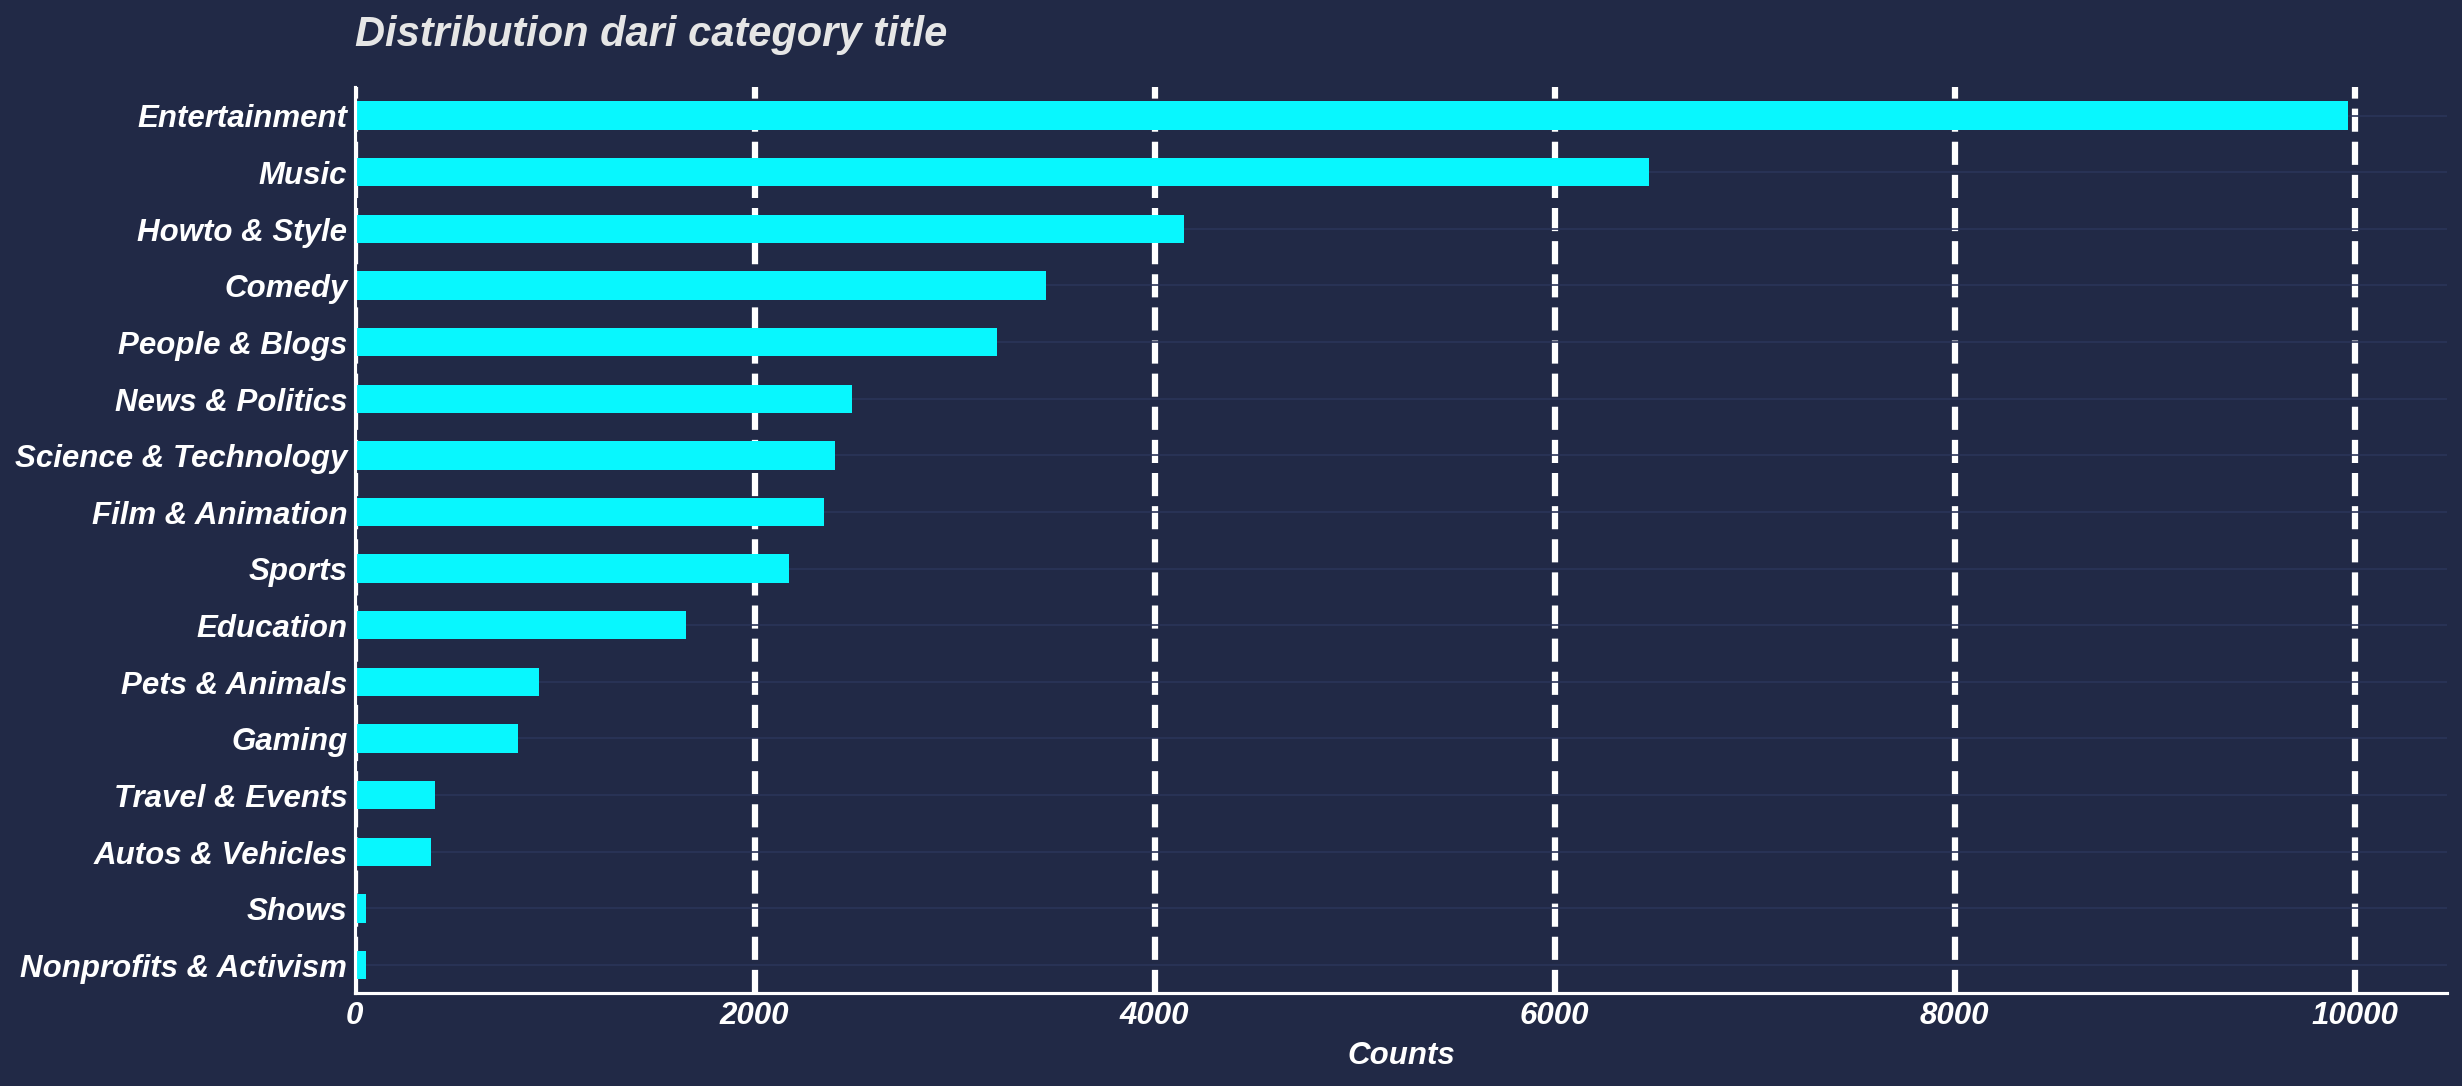

In [ ]:
# dengan bar chart 

new_df.category_title.value_counts().sort_values().plot(kind="barh",figsize=(18, 8))
plt.title("Distribution dari category title") 
plt.grid(axis="x", linewidth="3", linestyle="--", color="white")
plt.xlabel("Counts")

- Jumlah category video entertainment paling banyak dibandingkan category video nonprofits & activism dan shows yang paling sedikit.

In [ ]:
# channel title nya 

print(f"jumlah dari unik nilai di fitur channel title adalah {new_df.channel_title.nunique()} channel \n")
display(df.channel_title.value_counts()[:10].to_frame().style.set_caption("top 10 channel title"))

jumlah dari unik nilai di fitur channel title adalah 2207 channel 



,channel_title
ESPN,203
The Tonight Show Starring Jimmy Fallon,197
TheEllenShow,193
Vox,193
Netflix,193
The Late Show with Stephen Colbert,187
Jimmy Kimmel Live,186
Late Night with Seth Meyers,183
Screen Junkies,182
NBA,181


- Terdapat 2207 channel di data

In [ ]:
# dengan table 
# check descriptive analysis dari fitur numeric

df[["views", "likes", "dislikes", "comment_count"]].describe().style.set_precision(2).set_caption("descriptive analysis dari fitur numeric")

,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00
mean,2360784.64,74266.70,3711.40,8446.80
std,7394113.76,228885.34,29029.71,37430.49
min,549.00,0.00,0.00,0.00
25%,242329.00,5424.00,202.00,614.00
50%,681861.00,18091.00,631.00,1856.00
75%,1823157.00,55417.00,1938.00,5755.00
max,225211923.00,5613827.00,1674420.00,1361580.00


In [ ]:
#ayo liat baris yang mempunyai banyak views, likes, dislike & comment

# baris views
print("baris yang paling banyak jumlah views nya ") 
display(new_df.query('views == 225211923'))
print("\n") 

# baris likes 
print("baris yang paling banyak jumlah likes nya ") 
display(new_df.query('likes == 5613827'))
print("\n") 

# baris dislikes
print("baris yang paling banyak jumlah dislikes nya ") 
display(new_df.query('dislikes == 1674420'))
print("\n") 

# baris comment count
print("baris yang paling banyak jumlah comment nya ")
display(new_df.query('comment_count == 1361580'))

baris yang paling banyak jumlah views nya 


,trending_date,title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,new_publish_time,ndays_trending
38547,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,Music,2018-05-06,27




baris yang paling banyak jumlah likes nya 


,trending_date,title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,new_publish_time,ndays_trending
38273,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music,2018-05-18,14




baris yang paling banyak jumlah dislikes nya 


,trending_date,title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,new_publish_time,ndays_trending
11323,2018-01-09,So Sorry.,Logan Paul Vlogs,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,False,False,False,None,Entertainment,2018-01-02,7




baris yang paling banyak jumlah comment nya 


,trending_date,title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,new_publish_time,ndays_trending
11323,2018-01-09,So Sorry.,Logan Paul Vlogs,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,False,False,False,None,Entertainment,2018-01-02,7


In [ ]:
# rata rata rentang hari ketika video itu trending per label category
# singkat nya category title yang paling cepat trending setelah video di publish

new_df.groupby("category_title")["ndays_trending"].describe()[["mean","min","max"]].style.set_precision(2).set_caption("Rata-Rata dari total hari setelah di publish sampai video itu trending ").highlight_min(color="blue")

# biru == minimal
# mean == rata rata hari 
# min == minimal hari 
# max == maximal hari

,mean,min,max
category_title,,,
Autos & Vehicles,43.21,0.00,1771.00
Comedy,10.11,0.00,1951.00
Education,37.96,0.00,3027.00
Entertainment,13.01,0.00,4215.00
Film & Animation,41.06,0.00,3566.00
Gaming,21.95,0.00,2203.00
Howto & Style,7.91,0.00,945.00
Music,14.72,0.00,3451.00
News & Politics,18.58,0.00,2490.00


- Category video Nonprofits & Activism paling cepat trending dibandingkan category video lain nya berdasarkan rata rata.

In [ ]:
# mari lihat rata rata views, likes & dislike berdasarkan category title
new_df.groupby("category_title")[["views", "likes", "dislikes","comment_count"]].mean().style.set_precision(2).set_caption("rata-rata views, likes & dislikes berdasarkan category title").highlight_max(color="green")

# green == maximal

,views,likes,dislikes,comment_count
category_title,,,,
Autos & Vehicles,1355965.41,11056.40,632.84,2042.83
Comedy,1480308.42,62582.22,2091.52,6521.72
Education,712940.82,29745.03,816.41,3286.38
Entertainment,2067883.20,53243.33,4314.30,7383.23
Film & Animation,3106250.20,70787.84,2590.68,7627.74
Gaming,2620830.63,84502.18,11241.70,18042.49
Howto & Style,983730.12,39286.08,1320.28,5583.59
Music,6201003.12,218918.20,7907.76,19359.76
News & Politics,592587.74,7298.36,1680.76,2428.40


- Category music paling banyak di tonton di bandingkan category news & politics. 
- Category Nonprofits & Activism paling banyak mendapatkan likes, dislikes, & comment_count.
Berdasarkan rata rata

In [ ]:
# sekarang waktu nya untuk mencari hubungan kenapa video itu cepat trending

In [ ]:
# top 5 video & jumlah video yang paling cepat trending setelah di publish

print(f"jumlah video yang paling cepat trending adalah {new_df.query('ndays_trending == 0').shape[0]} video \n") 

new_df.query("ndays_trending == 0").sample(5) # secara random

jumlah video yang paling cepat trending adalah 121 video 



,trending_date,title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,new_publish_time,ndays_trending
7214,2017-12-20,The Most Beautiful Restaurant in Japan - Kyoto...,Simon and Martina,"simonandmartina|""simon""|""martina""|""simon and m...",67025,5946,74,879,False,False,False,"We're taking you to Kyoto Kitcho, a 3 Michelin...",Travel & Events,2017-12-20,0
215,2017-11-15,American Crime Story Season 2: The Assassinati...,TV Promos,"Donatella Versace|""Antonio D' Amico""|""Penelope...",14565,478,13,67,False,False,False,The Assassination of Gianni Versace: American ...,Entertainment,2017-11-15,0
7007,2017-12-19,The Voice 2017 Chloe Kohanski - Finale: “Wish ...,The Voice,"the voice|""the voice nbc""|""the voice season 13...",101636,4153,293,629,False,False,False,Chloe Kohanski sings Wish I Didn't Love You du...,Entertainment,2017-12-19,0
4830,2017-12-08,FBI director Christopher A. Wray testifies bef...,Washington Post,"breaking news video|""video updates""|""live vide...",32172,169,69,26,False,False,False,FBI Director Christopher A. Wray testifies bef...,News & Politics,2017-12-08,0
7201,2017-12-20,"It's true, wife and I are getting a divorce. ...",boogie2988,"boogie|""boogie2988""|""francis""|""boogie2988 wife...",488915,66620,2020,7947,False,False,False,My ex-wife has given me full permission to mak...,Entertainment,2017-12-20,0


In [ ]:
# top 5 video & jumlah video yang paling lama trending setelah di publish

print(f"jumlah video yang paling lama trending adalah {new_df.query('ndays_trending == 4215').shape[0]} video \n") 

new_df.query("ndays_trending == 4215").sample(5) # secara random

jumlah video yang paling lama trending adalah 1 video 



,trending_date,title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,new_publish_time,ndays_trending
16294,2018-02-05,Budweiser - Original Whazzup? ad,dannotv,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,False,False,False,"Original Whazzup ad - however, there is a litt...",Entertainment,2006-07-23,4215


In [ ]:

# check correlation dari fitur numeric

new_df[["views", "likes", "dislikes", "comment_count","ndays_trending"]].corr().style.background_gradient().set_caption("correlation dari fitur numeric")

,views,likes,dislikes,comment_count,ndays_trending
views,1.000000,0.849177,0.472213,0.617621,-0.014427
likes,0.849177,1.000000,0.447186,0.803057,-0.017650
dislikes,0.472213,0.447186,1.000000,0.700184,-0.007056
comment_count,0.617621,0.803057,0.700184,1.000000,-0.013254
ndays_trending,-0.014427,-0.017650,-0.007056,-0.013254,1.000000


Kesimpulan yang bisa saya ambil dari informasi tersebut adalah: 

- tidak ada hubungan dari views, likes, dislikes & comment_count dan ndays_trending, tetapi pasti ada sebab akibat nya. 
- jumlah views, like & comment sangat mempengaruhi cepat nya trending suatu video.

## Terima kasih

- [Github](https://github.com/sultanbst123)